# Image Compression using the SVD

The singular value decomposition may be used to compress the storage needed to store an image. In this work we will focus on a simple gray scale image. The below code loads the required libraries and shows a gray scale version of a photograph of the textbook author Gilbert Strang. 

The **singular value decomposition (SVD)** may be used to construct the optimal rank k approximation to a matrix. To do so we find the SVD of a matrix and then keep only the singular values the largest k singular values in maginitude. 

$$A\approx A_k= \sum_{j=1}^k \sigma_k |u_k\rangle \langle v_k|$$



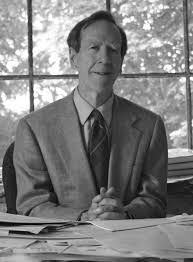

In [65]:
using Plots, LinearAlgebra, FileIO, Images
img = Gray.(load("strang.png"))



The below code converts the image to a matrix (imgMat) and shows the size of the matrix and gives you a preview of what is inside the matrix. 




In [66]:
imgMat=Float32.(img); #Make an image matrix
mysize=size(imgMat)
println("The Size of the image is: $(mysize)")
imgMat

The Size of the image is: (262, 193)


262×193 Array{Float32,2}:
 0.654902  0.619608  0.588235  0.584314  …  0.4       0.435294  0.439216
 0.643137  0.619608  0.596078  0.584314     0.427451  0.490196  0.490196
 0.647059  0.643137  0.627451  0.611765     0.462745  0.537255  0.580392
 0.662745  0.670588  0.666667  0.639216     0.498039  0.533333  0.643137
 0.662745  0.666667  0.658824  0.631373     0.517647  0.486275  0.623529
 0.654902  0.647059  0.631373  0.603922  …  0.52549   0.458824  0.560784
 0.690196  0.662745  0.631373  0.611765     0.52549   0.482353  0.529412
 0.741176  0.701961  0.658824  0.643137     0.529412  0.517647  0.537255
 0.670588  0.690196  0.678431  0.639216     0.509804  0.54902   0.541176
 0.592157  0.619608  0.658824  0.682353     0.482353  0.533333  0.521569
 0.560784  0.580392  0.643137  0.701961  …  0.447059  0.517647  0.556863
 0.623529  0.639216  0.670588  0.690196     0.435294  0.513726  0.729412
 0.698039  0.729412  0.737255  0.701961     0.439216  0.521569  0.745098
 ⋮                       



We may look at the image stored in a matrix using the command Gray.(Matrix)..... For example to get back to an image from our matrix we can type:



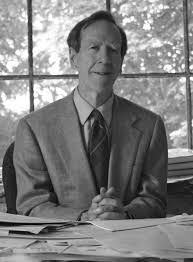

In [67]:
Gray.(imgMat)

The below code defines a function which finds the rank k approximation to a given matrix. I give an example where we find the 120 rank approximation to our image and then show the image:

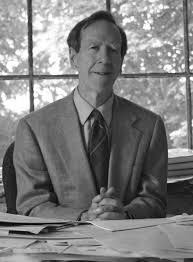

In [71]:
function rank_approx(A, k)
    U, S, V = svd(A)
    M = U[:, 1:k] * Diagonal(S[1:k]) * V[:, 1:k]'
    M = min.(max.(M, 0.0), 1.)
    return(M)
end

Gray.(rank_approx(imgMat,120))


In [72]:

pop=zeros(15,1);
for i=1:15: 
	pop[i]=sum(L^(i-1)*x0)
end
bar(0:14, pop)

UndefVarError: UndefVarError: L not defined

In [76]:



eigvals(randn(100,100))

100-element Array{Complex{Float64},1}:
  10.254255048685089 + 1.3998347830142583im
  10.254255048685089 - 1.3998347830142583im
  -9.040731852070195 + 5.114396222911852im 
  -9.040731852070195 - 5.114396222911852im 
   9.593911754899436 + 0.0im               
   7.632758276172357 + 6.478319249024397im 
   7.632758276172357 - 6.478319249024397im 
  -3.776308764146049 + 9.100890716800516im 
  -3.776308764146049 - 9.100890716800516im 
   8.277154063181175 + 4.718762123687561im 
   8.277154063181175 - 4.718762123687561im 
   2.130711233219956 + 9.405507912054182im 
   2.130711233219956 - 9.405507912054182im 
                     ⋮                     
 -2.0208731559895714 + 2.888911343635897im 
 -2.0208731559895714 - 2.888911343635897im 
   3.173733597052391 + 0.7073709310530878im
   3.173733597052391 - 0.7073709310530878im
  -2.280028479983387 + 1.3998432898340598im
  -2.280028479983387 - 1.3998432898340598im
  0.2139473711078037 + 2.312369523293099im 
  0.2139473711078037 - 2.312369523293

In [74]:
randn(10)

10-element Array{Float64,1}:
 -0.9602786234085765  
 -1.2850704014165144  
  0.28945789987143017 
  1.5714000675375537  
 -0.3140317423043957  
 -0.5273263269471494  
  0.010575045121630192
  0.0758450030758077  
 -0.7084829824817178  
  0.49962201424195773 

In [77]:
for i=1:10
    println(i)
end

1
2
3
4
5
6
7
8
9
10


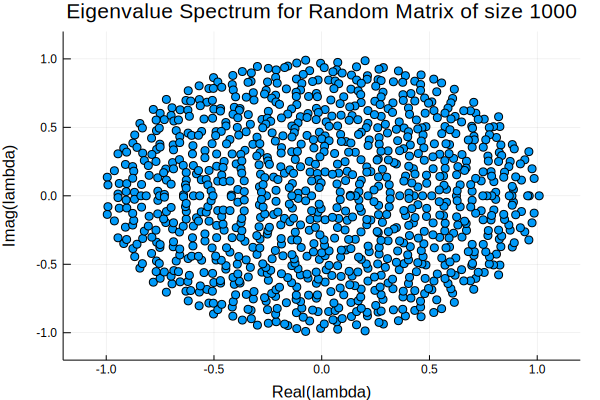

In [84]:
using Plots, LinearAlgebra

function plot_spectrum_rm(n)
	 M=1.0/sqrt(n)*randn(n,n);
	 evals=eigvals(M)
	 p=scatter(real.(evals), imag.(evals), label="")
    xlims!(-1.2,1.2)
    ylims!(-1.2,1.2)
    xlabel!("Real(lambda)")
    ylabel!("Imag(lambda)")
    title!("Eigenvalue Spectrum for Random Matrix of size $(n)")
	 display(p)
end

plot_spectrum_rm(1000)

In [90]:
N=Float64.(abs.(randn(1000,1000)).<0.1)

1000×1000 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0     1.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  1.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0     0.0  0.0  0.0  0.0  0.0  0.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     1.0  0.0  0.0  0.0  0.0  1.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  1.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  

1000×1000 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0     1.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  1.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0     0.0  0.0  0.0  0.0  0.0  0.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     1.0  0.0  0.0  0.0  0.0  1.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  1.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  